<a href="https://colab.research.google.com/github/Jayjake1/DataAnalysis/blob/main/Global_Terrorism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
data = pd.read_csv('/content/drive/MyDrive/Almabetter/Data Analysis Projects/data - Global Terrorism Data.csv',encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [16]:
data.tail(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181681,201712310016,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Shariff Aguak,6.862806,124.443649,1.0,0,The incident occurred in the Poblacion Mother ...,12/31/2017: A roadside bomb detonated targetin...,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,3,Police,23.0,Police Patrol (including vehicles and convoys),Philippine National Police (PNP),Patrol,...,NaN,NaN,A roadside bomb was used in the attack.,1.0,0.0,0.0,5.0,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,A police vehicle was damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The victims included Senior Police Officer 4 M...,"""3 dead, scores injured in Mindanao blasts,"" M...","""Cop, 2 others killed in bomb blasts in Mindan...","""Cop killed, 7 injured in Maguindanao IED blas...",START Primary Collection,0,0,0,0,NaN
181682,201712310017,2017,12,31,NaN,0,NaN,98,Italy,8,Western Europe,Marche,Spinetoli,42.888982,13.772795,1.0,0,The incident occurred in the Ascoli Piceno dis...,12/31/2017: Assailants set fire to a migrants'...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,65.0,Refugee (including Camps/IDP/Asylum Seekers),Unknown,Migrant Center,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,A migrants' center was damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Arson attack probed as racial crime,"" Ansa.it...","""Ascoli, a building destined for migrants goes...",NaN,START Primary Collection,-9,-9,0,-9,NaN
181683,201712310018,2017,12,31,NaN,0,NaN,4,Afghanistan,6,South Asia,Faryab,Kohistan district,35.315467,64.815508,3.0,0,NaN,12/31/2017: Assailants attacked the house of a...,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,17,Terrorists/Non-State Militia,94.0,Non-State Militia,National Uprising Movement (NUM),House of Member,...,NaN,NaN,NaN,6.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Six Members Of One Family Shot Dead In Faryab...","""Highlights: Pakistan Pashto Press 02 January ...",NaN,START Primary Collection,0,0,0,0,NaN
181684,201712310019,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Assam,Hungrum,25.180162,93.015788,2.0,0,The incident occurred in the Dima Hasao distri...,12/31/2017: Assailants abducted Prafulla Phuka...,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,NC Hills Autonomous Council,Personal Security Officer of Council Member Ih...,...,NaN,NaN,A 9-mm carbine rifle was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,14.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,5.0,Successful Rescue,1.0,NaN,"""Abducted PSO rescued within 11 hours,"" The Se...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181685,201712310020,2017,12,31,NaN,0,NaN,4,Afghanistan,6,South Asia,Faryab,Maymana,35.921051,64.774544,1.0,0,NaN,12/31/2017: An explosive device detonated at a...,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,1,Business,7.0,Retail/Grocery/Bakery,Unknown,Jewelry Shop,...,NaN,NaN,NaN,0

In [15]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [80]:
data.shape

(181691, 58)

In [19]:
data.size

24528285

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [26]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [30]:
data.isnull().sum()/len(data)*100  # percent of null values

eventid        0.000000
iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate    94.914993
                ...    
INT_LOG        0.000000
INT_IDEO       0.000000
INT_MISC       0.000000
INT_ANY        0.000000
related       86.219461
Length: 135, dtype: float64

In [28]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB
None


# Data cleaning

In [32]:
# removing rows with >50% null values
cols = data.columns
cols

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [41]:
# using thres to drop >50% nulls

thresh = len(data) * .5
data.dropna(thresh = thresh, axis = 1, inplace = True)

In [42]:
data.shape

(181691, 58)

In [43]:
data.isnull().sum()/len(data) *100

eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
extended             0.000000
country              0.000000
country_txt          0.000000
region               0.000000
region_txt           0.000000
provstate            0.231712
city                 0.238867
latitude             2.507554
longitude            2.508104
specificity          0.003302
vicinity             0.000000
summary             36.396409
crit1                0.000000
crit2                0.000000
crit3                0.000000
doubtterr            0.000550
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1          0.000000
attacktype1_txt      0.000000
targtype1            0.000000
targtype1_txt        0.000000
targsubtype1         5.709144
targsubtype1_txt     5.709144
corp1               23.418882
target1              0.350045
natlty1              0.858050
natlty1_txt          0.858050
gname     

In [44]:
# dropping duplicates
data.drop_duplicates() # this removes duplicates that are row based

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,0.0,1,0,2,Armed Assault,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,Al-Shabaab,0.0,0,-99.0,0.0,1.0,5,Firearms,5.0,Unknown Gun Type,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,0.0,"""Somalia: Al-Shabaab Militants Attack Army Che...",START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,0.0,1,0,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,Muslim extremists,0.0,0,-99.0,0.0,0.0,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,0.0,"""Putin's 'victory' in Syria has turned into a ...",START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0,-99.0,0.0,0

No duplicates... above

In [47]:
data.dtypes

eventid               int64
iyear                 int64
imonth                int64
iday                  int64
extended              int64
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
city                 object
latitude            float64
longitude           float64
specificity         float64
vicinity              int64
summary              object
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr           float64
multiple            float64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt      object
targtype1             int64
targtype1_txt        object
targsubtype1        float64
targsubtype1_txt     object
corp1                object
target1              object
natlty1             float64
natlty1_txt          object
gname                object
guncertain1         float64
individual          

In [52]:
int_cols=data.select_dtypes(include=np.number).columns.tolist()

In [53]:
# Filling data with respective medians and modes
for i in int_cols:
  data[i] = data[i].fillna(data[i].median())

In [75]:
data.isnull().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             420
city                  434
latitude                0
longitude               0
specificity             0
vicinity                0
summary             66129
crit1                   0
crit2                   0
crit3                   0
doubtterr               0
multiple                0
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1            0
targsubtype1_txt    10373
corp1               42550
target1               636
natlty1                 0
natlty1_txt          1559
gname                   0
guncertain1             0
individual              0
nperps                  0
nperpcap                0
claimed     

In [64]:
string_cols=data.select_dtypes(include=object).columns.tolist()
string_cols

['country_txt',
 'region_txt',
 'provstate',
 'city',
 'summary',
 'attacktype1_txt',
 'targtype1_txt',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1_txt',
 'gname',
 'weaptype1_txt',
 'weapsubtype1_txt',
 'weapdetail',
 'scite1',
 'dbsource']

In [66]:
for i in string_cols:
  print(data[i].describe())   # checking whether I can input mode to this data
  print('--------------------')

count     181691
unique       205
top         Iraq
freq       24636
Name: country_txt, dtype: object
--------------------
count                         181691
unique                            12
top       Middle East & North Africa
freq                           50474
Name: region_txt, dtype: object
--------------------
count      181270
unique       2855
top       Baghdad
freq         7645
Name: provstate, dtype: object
--------------------
count      181257
unique      36674
top       Unknown
freq         9775
Name: city, dtype: object
--------------------
count                                                115562
unique                                               112492
top       09/00/2016: Sometime between September 18, 201...
freq                                                    100
Name: summary, dtype: object
--------------------
count                181691
unique                    9
top       Bombing/Explosion
freq                  88255
Name: attacktype1_txt, dtype: ob

In [68]:
for i in ['provstate','city','target1','natlty1_txt']:
  print(data[i].describe())

count      181270
unique       2855
top       Baghdad
freq         7645
Name: provstate, dtype: object
count      181257
unique      36674
top       Unknown
freq         9775
Name: city, dtype: object
count        181055
unique        86006
top       Civilians
freq           6461
Name: target1, dtype: object
count     180132
unique       215
top         Iraq
freq       24113
Name: natlty1_txt, dtype: object


In [76]:
for i in ['provstate','city','target1','natlty1_txt']:
  data[i]=data[i].fillna(data[i].mode()[0])  # cause its string
  # data[i] = data[i].fillna(data[i].median())

In [77]:
data.isnull().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate               0
city                    0
latitude                0
longitude               0
specificity             0
vicinity                0
summary             66129
crit1                   0
crit2                   0
crit3                   0
doubtterr               0
multiple                0
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1            0
targsubtype1_txt    10373
corp1               42550
target1                 0
natlty1                 0
natlty1_txt             0
gname                   0
guncertain1             0
individual              0
nperps                  0
nperpcap                0
claimed     

In [81]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [82]:
data.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Baghdad,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,-99.0,0.0,0.0,13,Unknown,12.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,0.0,0.0,13,Unknown,12.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,-99.0,0.0,0.0,13,Unknown,12.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,-99.0,0.0,0.0,8,Incendiary,12.0,NaN,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,PGIS,-9,-9,1,1


In [85]:
data=data[['iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid','dbsource']] # taking required columns for my analysis

# Univariate Anaysis

Text(0.5, 1.0, 'Year wise attacks')

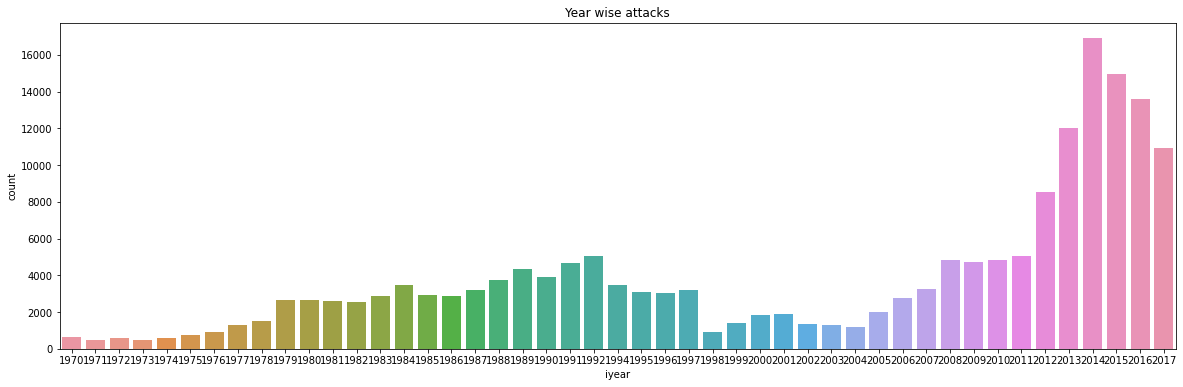

In [97]:
plt.figure(figsize=(20,6))
sns.countplot(data['iyear']).set_title('Year wise attacks')

- More number of attacks in 2014




Text(0.5, 1.0, 'Month wise attacks')

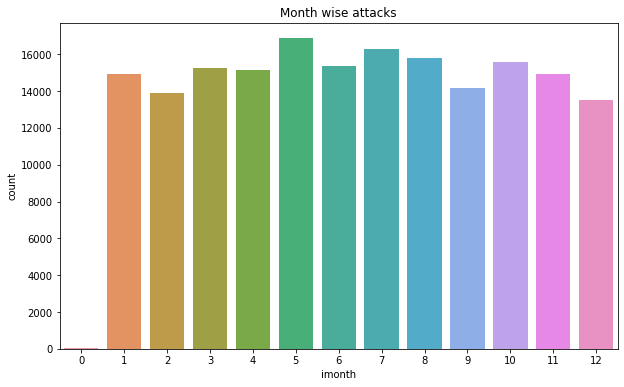

In [101]:
plt.figure(figsize=(10,6))
sns.countplot(data['imonth']).set_title('Month wise attacks')

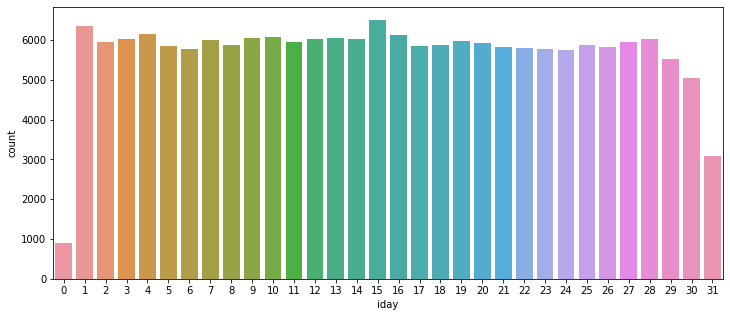

In [102]:
plt.figure(figsize=(12,5))
sns.countplot(data['iday'])

In [112]:
country_wise=data['country_txt'].value_counts().reset_index()
country_wise.rename(columns={"index":'Country Name','country_txt':'Count'},inplace=True)
country_wise

,Country Name,Count
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
...,...,...
200,North Korea,1
201,Andorra,1
202,Antigua and Barbuda,1
203,Vatican City,1


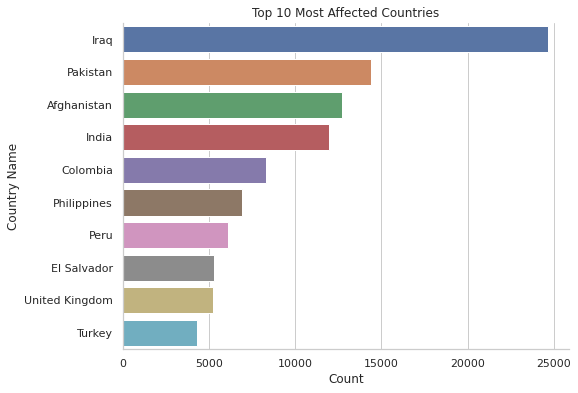

In [136]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8,6))
# sns.set_color_codes("muted")
sns.color_palette("pastel") # Set2 , ("husl", 9), ("flare", as_cmap=True)"pastel"
sns.barplot(x="Count", y="Country Name", data=country_wise[:10])
plt.title('Top 10 Most Affected Countries')
# plt.xlabel(' ')
# plt.ylabel('')
sns.despine()
plt.show()

In [137]:
region_wise=data['region_txt'].value_counts().reset_index()
region_wise.rename(columns={"index":'Region Name','region_txt':'Count'},inplace=True)
region_wise

,Region Name,Count
0,Middle East & North Africa,50474
1,South Asia,44974
2,South America,18978
3,Sub-Saharan Africa,17550
4,Western Europe,16639
5,Southeast Asia,12485
6,Central America & Caribbean,10344
7,Eastern Europe,5144
8,North America,3456
9,East Asia,802


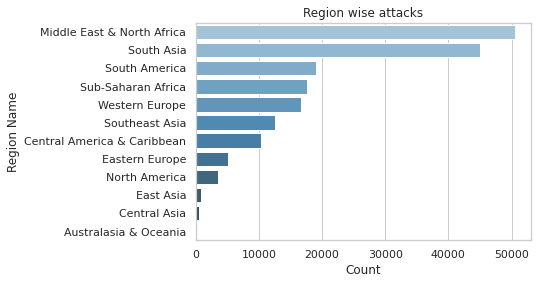

In [139]:
ax = sns.barplot(x="Count", y="Region Name", data=region_wise,
                 palette="Blues_d").set_title('Region wise attacks')


- Middle East & North Africe are most Affected regions

In [140]:
city_wise=data['city'].value_counts().reset_index()
city_wise.rename(columns={"index":'City Name','city':'Count'},inplace=True)
city_wise

,City Name,Count
0,Unknown,10209
1,Baghdad,7589
2,Karachi,2652
3,Lima,2359
4,Mosul,2265
...,...,...
36669,Sinating,1
36670,Utta,1
36671,Chateauneuf-d'Ille-et-Vilaine,1
36672,El Pital,1


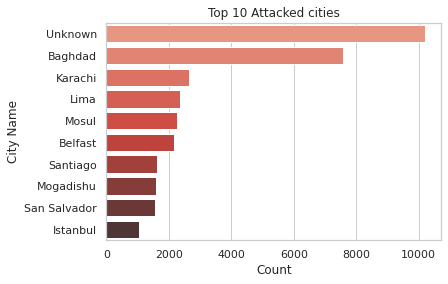

In [142]:
ax = sns.barplot(x="Count", y="City Name", data=city_wise[:10],
                 palette="Reds_d").set_title('Top 10 Attacked cities')

- Not registered in database and Baghdad are top affected by attacks